In [183]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/plot.R")
source("R/Cbind.R")
theme_set(theme_prism(base_size=20))
options(repr.plot.width=15, repr.plot.height=15)

In [144]:
experiments <- c("24hr LTM")
trainings <- c("6X_Massed", "6X_Spaced")
genotypes <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO")
intervals <- c("NONE")
data <- data.table::fread(file = "tidy_data_wide.csv")

In [145]:
data$Training <- factor(data$Training, levels=trainings)

In [146]:
panel4_data <- data[Training %in% trainings & Genotype %in% genotypes & interval %in% intervals  & experiment %in% experiments & region_id != "NONE",]

In [147]:
nrow(panel4_data[Training == "6X_Massed" & region_id!="NONE" ,.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)])

[1] 20

In [148]:
A <- panel4_data[Training == "6X_Massed" & region_id!="NONE",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
B <- panel4_data[Training == "6X_Spaced" & region_id!="NONE",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
Ad <- A[, (delta = POST-PRE)]
Bd <- B[, (delta = POST-PRE)]
X<-Cbind(Ad, Bd)
colnames(X) <- trainings

In [149]:
data.table::fwrite(x = A, file="prism/Fig4/Figure_4A_6X_Massed.csv")
data.table::fwrite(x = B, file="prism/Fig4/Figure_4A_6X_Spaced.csv")
data.table::fwrite(x = X, file="prism/Fig4/Figure_4_boxplot.csv")

In [150]:
panel4_data_long <- melt(panel4_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")

In [151]:
table(panel4_data_long$Training)


6X_Massed 6X_Spaced 
       40        40 

[1] -1.20  1.25


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 2

$direction
[1] "horizontal"


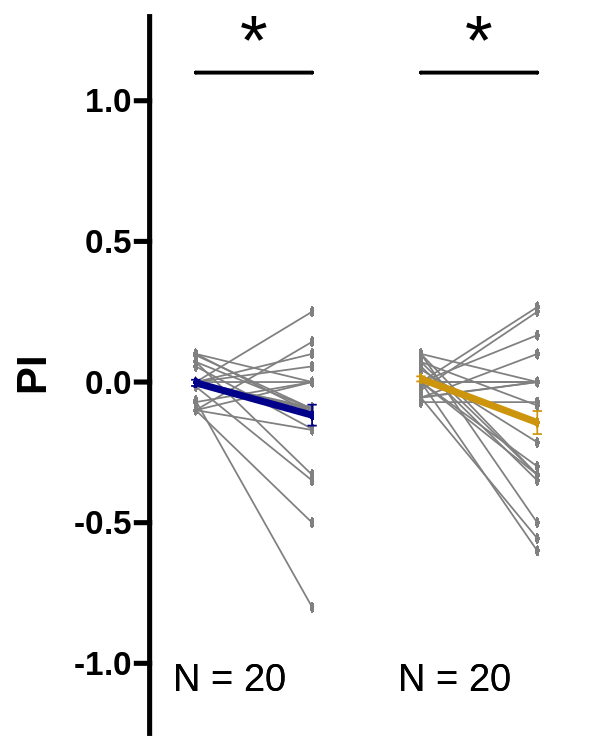

In [152]:
size_unit=2.5
ratio=2.5

panel4A <- learning_plot(
    data=panel4_data_long, "Training",
    textsize=8,
    hjust_text = 0.2,
    y_annotation=1.1,
    y_limits=c(-1.2, 1.25),
    colors=colors_panel4[1:length(trainings)])
options(repr.plot.width=size_unit*panel4A$n_facets, repr.plot.height=size_unit*ratio)

save_learning_plot(plot=panel4A, filename = "figures/panel4A.svg", size_unit = size_unit, ratio = ratio)
panel4A

In [153]:
summ_statistics <- panel4_data_long[test=="POST", .(PI=mean(PI), stderror=sd(PI)/sqrt(.N)), by=experiment]

In [154]:
# panel4_data[, .(Files, ROI)]

In [155]:
dt_bin <- readRDS("dt_bin.RDS")
metadata <- dt_bin[,meta=TRUE]

In [156]:
metadata_no_training <- metadata[ROI=="NONE",]
metadata <- metadata[ROI!="NONE",]
metadata$ROI <- as.integer(metadata$ROI)

In [157]:
source("prism_compat.R")

In [158]:
# dt_bin[, meta=T]
metadata <- merge(
    panel4_data[, .(Files, ROI)],
    metadata,
    by=c("Files", "ROI"), all.x=TRUE, all.y=FALSE
)
metadata$ROI <- as.character(metadata$ROI)


In [159]:
metadata <- rbind(metadata, metadata_no_training)

In [160]:
dt_bin<-dt_bin[id %in% metadata$id,]

In [161]:
id<-"id"
group <- "Training"

dt_bin_full <- behavr::rejoin(dt_bin)
dt_bin_full_wide <- add_ghost_data(dt_bin_full, id=id, x="t", columns=c("asleep"), group=group, to_wide=TRUE)

    
dt_bin_full_wide$zt <- dt_bin_full_wide$t/3600
out <- dt_bin_full_wide[ , setdiff(colnames(dt_bin_full_wide), c("zt", "t")), with=FALSE]
print(dim(out))


A <- dt_bin_full[Training == "6X_Spaced", .(Files, ROI, User, Genotype, Training, experiment, t, asleep, id, region_id, machine_name)]
B <- dt_bin_full[Training == "6X_Massed", .(Files, ROI, User, Genotype, Training, experiment, t, asleep, id, region_id, machine_name)]
C <- dt_bin_full[Training == "No_training", .(Files, ROI, User, Genotype, Training, experiment, t, asleep, id, region_id, machine_name)]

       group__ n_flies max diff
1: No_training      31  31    0
2:   6X_Massed      20  31   11
3:   6X_Spaced      20  31   11
[1] "No_training" "6X_Massed"   "6X_Spaced"  
[1] 55 31
[1] 55 31
[1] 55 31
[1] 55 93


In [138]:
data.table::fwrite(x = out, file="prism/Fig4/Figure_4B_sleep.csv")
data.table::fwrite(x = A, file="prism/Fig4/Figure_4B_6X_Spaced.csv")
data.table::fwrite(x = B, file="prism/Fig4/Figure_4B_6X_Massed.csv")
data.table::fwrite(x = C, file="prism/Fig4/Figure_4B_No_training.csv")

In [163]:
head(dt_bin_full_wide$zt)

[1] 3.5 4.0 4.5 5.0 5.5 6.0

In [179]:
sleep_zt05_zt11 <- dt_bin_full[(t >= behavr::hours(5)) & (t < behavr::hours(11)) , .(asleep = sum(asleep)), by=.(id, Training)]

In [181]:
A <- sleep_zt05_zt11[Training == "6X_Massed" , asleep]
B <- sleep_zt05_zt11[Training == "6X_Spaced" , asleep]
C <- sleep_zt05_zt11[Training == "No_training" , asleep]
X <- Cbind(A, B, C)
colnames(X) <- c("6X_Massed", "6X_Spaced", "No training")

In [182]:
data.table::fwrite(x=X, file = "prism/Fig4/Figure_4_boxplot_sleep.csv")